# RoboReviews Project
#### The new product review aggregator

## Phase 1: Setting up the environment

#### Loading the Dataset and Explore

In [1]:
import pandas as pd

# Load dataset
dataset_path = r'/notebooks/combined_amazon_reviews.csv'
df = pd.read_csv(dataset_path)

# Print the first few rows of the DataFrame
print(df.columns)


Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'reviews.dateAdded', 'reviews.userCity', 'reviews.userProvince'],
      dtype='object')


/tmp/ipykernel_1152/3836848997.py:5: DtypeWarning: Columns (1,2,3,7,8,11,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


#### Removing unnecesary columns

In [2]:
# Define the columns to keep
columns_to_keep = ['name', 'brand', 'primaryCategories', 'reviews.rating', 'reviews.text']

# Drop the columns that are not in the 'columns_to_keep' list
df_cleaned = df[columns_to_keep]

# Verify the cleaned dataset
print("Cleaned Dataset Preview:")
print(df_cleaned.head())

# Check the remaining columns
print("Remaining Columns:")
print(df_cleaned.columns)


Cleaned Dataset Preview:
                                                name         brand  \
0  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
1  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
2  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
3  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   
4  AmazonBasics AAA Performance Alkaline Batterie...  Amazonbasics   

  primaryCategories  reviews.rating  \
0   Health & Beauty             3.0   
1   Health & Beauty             4.0   
2   Health & Beauty             5.0   
3   Health & Beauty             5.0   
4   Health & Beauty             5.0   

                                        reviews.text  
0  I order 3 of them and one of the item is bad q...  
1  Bulk is always the less expensive way to go fo...  
2  Well they are not Duracell but for the price i...  
3  Seem to work as well as name brand batteries a...  
4  These batteries are very long lasting the

#### Find and Handle Missing Values


In [3]:
# Check for missing values in all columns
missing_values = df_cleaned.isnull().sum()

# Display only columns that have missing values
missing_values = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_values)


Columns with missing values:
name                  6760
primaryCategories    34660
reviews.rating          33
reviews.text             1
dtype: int64


We will not clean missing values, since the Rating and the Text are important. instead, we will fill missing ratings with the median rating.

In [4]:
# Fill missing text with a placeholder
df_cleaned.loc[:, 'reviews.text'] = df_cleaned['reviews.text'].fillna('No review text provided.')



In [5]:
# Check the count of ratings from 0 to 5 in the dataset
rating_counts = df_cleaned['reviews.rating'].value_counts().sort_index()

# Display the count of ratings from 0 to 5
print("Count of ratings from 0 to 5:")
print(rating_counts)

Count of ratings from 0 to 5:
reviews.rating
1.0     1438
2.0     1072
3.0     2902
4.0    15397
5.0    47150
Name: count, dtype: int64


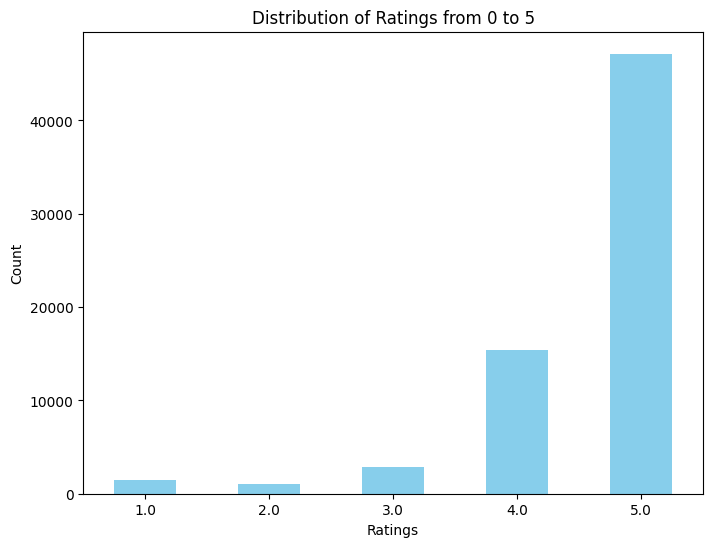

In [6]:
#visualize it with a bar plot
import matplotlib.pyplot as plt

# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings from 0 to 5')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### Text Preprocessing Steps:
We will do some minimum text preprocessing since later we will use the BERT tokenizer for BERT-base-uncased model

In [7]:
import re

# Minimal preprocessing function (to prepare text for BERT tokenizer)
def preprocess_text_for_bert(text):
    # Convert to lowercase (for 'uncased' models; skip this for 'cased' models)
    text = text.lower()
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing function to 'reviews.text'
df_cleaned['cleaned_text'] = df_cleaned['reviews.text'].apply(preprocess_text_for_bert)

# Preview the cleaned text
print(df_cleaned[['reviews.text', 'cleaned_text']].head())


                                        reviews.text  \
0  I order 3 of them and one of the item is bad q...   
1  Bulk is always the less expensive way to go fo...   
2  Well they are not Duracell but for the price i...   
3  Seem to work as well as name brand batteries a...   
4  These batteries are very long lasting the pric...   

                                        cleaned_text  
0  i order 3 of them and one of the item is bad q...  
1  bulk is always the less expensive way to go fo...  
2  well they are not duracell but for the price i...  
3  seem to work as well as name brand batteries a...  
4  these batteries are very long lasting the pric...  


/tmp/ipykernel_1152/3067902798.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_text'] = df_cleaned['reviews.text'].apply(preprocess_text_for_bert)


In [8]:
df_cleaned.head()

,name,brand,primaryCategories,reviews.rating,reviews.text,cleaned_text
0,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,3.0,I order 3 of them and one of the item is bad q...,i order 3 of them and one of the item is bad q...
1,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,4.0,Bulk is always the less expensive way to go fo...,bulk is always the less expensive way to go fo...
2,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,5.0,Well they are not Duracell but for the price i...,well they are not duracell but for the price i...
3,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,5.0,Seem to work as well as name brand batteries a...,seem to work as well as name brand batteries a...
4,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,5.0,These batteries are very long lasting the pric...,these batteries are very long lasting the pric...


BERT Tokenization for sentiment classification

In [9]:
from transformers import BertTokenizer

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the 'cleaned_text' column using BERT tokenizer
def tokenize_text(text):
    return tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors="pt")

# Tokenize a single example for testing
sample_text = df_cleaned['cleaned_text'][0]
tokenized_output = tokenize_text(sample_text)
print(tokenized_output)


{'input_ids': tensor([[  101,  1045,  2344,  1017,  1997,  2068,  1998,  2028,  1997,  1996,
          8875,  2003,  2919,  3737,  1012,  2003,  4394, 10200,  3500,  2061,
          1045,  2031,  2000,  2404,  1037, 27019,  1997, 13061,  2000,  2191,
          1996,  6046,  2147,  1012,   102,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

Tokenizing entire dataset

In [38]:
# Tokenize the entire dataset (reviews.text)
# Store tokenized input IDs and attention masks
input_ids = []
attention_masks = []

for review in df_cleaned['cleaned_text']:
    encoded_review = tokenize_text(review)
    input_ids.append(encoded_review['input_ids'])
    attention_masks.append(encoded_review['attention_mask'])

# Convert lists to tensors for later use with BERT
print("Tokenization complete!")


Tokenization complete!


# Setting up BERT based model for Sentiment Classification
we will map both reviews.rating and reviews.text columns to obtain a more accurate sentiment, instead of only the numerical rating

Mapping reviews.rating to Sentiment Labels.
 - For the rating rows that are not being filled, we are telling the machine to take in consideration the text written on that row instead of the rating
 - Using a Pre-trained Sentiment Analysis Model for reviews.text (finiteautomata, bertweet-base-sentiment-analysis", Model trained with SemEval 2017 corpus (around ~40k tweets))

In [11]:
from transformers import pipeline

# Load the pre-trained sentiment analysis model from Hugging Face
sentiment_analyzer = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

# Function to analyze review text sentiment using the pre-trained model
def analyze_review_sentiment(review_text):
    try:
        analysis = sentiment_analyzer(review_text)[0]
        if analysis['label'] == 'POSITIVE':
            return 2  # Positive
        elif analysis['label'] == 'NEGATIVE':
            return 0  # Negative
    except:
        return 1  # Neutral if there's an error or too short text, mark as neutral

# Apply the sentiment analysis model to 'reviews.text'
df_cleaned['text_sentiment'] = df_cleaned['reviews.text'].apply(analyze_review_sentiment)

# Verify the text sentiment column is created
print(df_cleaned[['reviews.text', 'text_sentiment']].head())


2024-10-15 14:32:28.878699: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 14:32:28.878751: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 14:32:28.879695: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-15 14:32:28.885386: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-15 14:32:29.630805: W tensorflow/compiler/tf2

                                        reviews.text  text_sentiment
0  I order 3 of them and one of the item is bad q...             NaN
1  Bulk is always the less expensive way to go fo...             NaN
2  Well they are not Duracell but for the price i...             NaN
3  Seem to work as well as name brand batteries a...             NaN
4  These batteries are very long lasting the pric...             NaN


/tmp/ipykernel_1152/1988594142.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['text_sentiment'] = df_cleaned['reviews.text'].apply(analyze_review_sentiment)


In [21]:
# Function to map sentiment based on reviews.rating and text sentiment
def map_rating_sentiment(row):
    if pd.isnull(row['reviews.rating']):  # If rating is missing
        return row['text_sentiment']  # Use sentiment from the text
    else:
        # Map rating to sentiment (adjust the thresholds as needed)
        if row['reviews.rating'] >= 4:
            return 2  # Positive
        elif row['reviews.rating'] == 3:
            return 1  # Neutral
        else:
            return 0  # Negative

# Apply the modified sentiment mapping logic
df_cleaned['final_sentiment'] = df_cleaned.apply(map_rating_sentiment, axis=1)

# Check the final sentiment labels
print(df_cleaned[['reviews.rating', 'reviews.text', 'text_sentiment', 'final_sentiment']].head())


   reviews.rating                                       reviews.text  \
0             3.0  I order 3 of them and one of the item is bad q...   
1             4.0  Bulk is always the less expensive way to go fo...   
2             5.0  Well they are not Duracell but for the price i...   
3             5.0  Seem to work as well as name brand batteries a...   
4             5.0  These batteries are very long lasting the pric...   

   text_sentiment  final_sentiment  
0             NaN              1.0  
1             NaN              2.0  
2             NaN              2.0  
3             NaN              2.0  
4             NaN              2.0  


/tmp/ipykernel_1152/3612161423.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rating_sentiment'] = df_cleaned['reviews.rating'].apply(map_rating_sentiment)


Combine reviews.rating and reviews.text Sentiments

In [18]:
print(df_cleaned.columns)

Index(['name', 'brand', 'primaryCategories', 'reviews.rating', 'reviews.text',
       'cleaned_text', 'text_sentiment', 'final_sentiment'],
      dtype='object')


In [23]:
# Function to combine rating and text sentiment to derive final sentiment
def combine_sentiments(rating_sentiment, text_sentiment):
    if pd.isnull(rating_sentiment):  # If rating is missing, rely on text sentiment
        return text_sentiment
    else:
        # If the rating is neutral (1), rely more on the text sentiment
        if rating_sentiment == 1:  # Neutral rating
            return text_sentiment
        else:
            # Otherwise, prioritize the rating sentiment
            return rating_sentiment

# Apply the function to combine both sentiments
df_cleaned['final_sentiment'] = df_cleaned.apply(
    lambda row: combine_sentiments(row['rating_sentiment'], row['text_sentiment']), axis=1
)

# Check the final sentiment labels
print(df_cleaned[['reviews.rating', 'reviews.text', 'rating_sentiment', 'text_sentiment', 'final_sentiment']].head())


   reviews.rating                                       reviews.text  \
0             3.0  I order 3 of them and one of the item is bad q...   
1             4.0  Bulk is always the less expensive way to go fo...   
2             5.0  Well they are not Duracell but for the price i...   
3             5.0  Seem to work as well as name brand batteries a...   
4             5.0  These batteries are very long lasting the pric...   

   rating_sentiment  text_sentiment  final_sentiment  
0                 1             NaN              NaN  
1                 2             NaN              2.0  
2                 2             NaN              2.0  
3                 2             NaN              2.0  
4                 2             NaN              2.0  


/tmp/ipykernel_1152/1563251262.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['final_sentiment'] = df_cleaned.apply(


Prepare the data for training

In [34]:
import torch
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split

# Ensure input_ids and attention_masks are in list format (if not already).
# If they are PyTorch tensors already, skip the cat() step

#input_ids = torch.stack(input_ids)  # Stack the list of tensors into a single tensor
#attention_masks = torch.stack(attention_masks)  # Do the same for attention masks
#THIS LEAD TO ERROR:  input_ids list contains tensors of different lengths. 

b_input_ids = b_input_ids.squeeze()
b_input_mask = b_input_mask.squeeze()# Pad the sequences and stack them into a single tensor


# Convert final sentiment labels into a tensor
labels = torch.tensor(df_cleaned['final_sentiment'].values)

# Split the data into training and validation sets (80% train, 20% validation)
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, test_size=0.2, random_state=42)
train_masks, val_masks = train_test_split(attention_masks, test_size=0.2, random_state=42)

# Move the data to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_inputs, train_masks, train_labels = train_inputs.to(device), train_masks.to(device), train_labels.to(device)
val_inputs, val_masks, val_labels = val_inputs.to(device), val_masks.to(device), val_labels.to(device)

print("Data is ready for training!")



Data is ready for training!


BERT Model Setup
 - We will set it up for fine tuning

In [35]:
from transformers import BertForSequenceClassification, AdamW

# Load pre-trained BERT model with a classification head (3 labels: positive, neutral, negative)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Move the model to the device (GPU or CPU)
model.to(device)

# Set up class weights
#class_weights = torch.tensor([1.0, 3.0, 1.0])  # ADDED LINE: the Neutral class is being underrepresented

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Loss function (cross-entropy for classification)
criterion = torch.nn.CrossEntropyLoss()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training Loop

In [36]:
# Training Loop
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    # Training phase
    model.train()  # Set model to training mode
    total_loss = 0
    
    for step, batch in enumerate(train_dataloader):
        # Unpack the batch
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Clear gradients
        model.zero_grad()
        
        # Forward pass: get logits (outputs)
        outputs = model(b_input_ids, attention_mask=b_input_mask)
        loss = criterion(outputs, b_labels)        
        # Extract the loss and logits
        loss = outputs.loss  # Loss is the first output
        logits = outputs.logits  # Logits are the second output
        
        # Backward pass: compute gradients
        loss.backward()

        # Update parameters
        optimizer.step()
        
        total_loss += loss.item()

    print(f"Training loss: {total_loss / len(train_dataloader)}")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    total_val_loss = 0
    predictions, true_labels = [], []

    for batch in val_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():  # Disable gradient calculation for validation
            outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        
        loss = outputs.loss
        logits = outputs.logits
        
        total_val_loss += loss.item()

        # Move logits and labels to CPU for evaluation
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.cpu().numpy()

        predictions.append(logits)
        true_labels.append(label_ids)

    print(f"Validation loss: {total_val_loss / len(val_dataloader)}")




Epoch 1/3


ValueError: too many values to unpack (expected 2)

In [28]:
print(df_cleaned['final_sentiment'].value_counts())


final_sentiment
2    63606
0     4350
1        2
Name: count, dtype: int64


Model Evaluation

In [29]:
import numpy as np  
from sklearn.metrics import classification_report

# Get predictions
model.eval()
predictions, true_labels = [], []

for batch in val_dataloader:
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
        outputs = model(b_input_ids, attention_mask=b_input_mask)
        logits = outputs.logits
    predictions.append(logits.argmax(dim=1).cpu().numpy())
    true_labels.append(b_labels.cpu().numpy())

# Flatten predictions and true labels
predictions = np.concatenate(predictions, axis=0)
true_labels = np.concatenate(true_labels, axis=0)

# Classification report
target_names = ['Negative', 'Neutral', 'Positive']
labels = [0, 1, 2]  # assuming these are the correct labels
print(classification_report(true_labels, predictions, labels=labels, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.86      0.78      0.81       850
     Neutral       0.00      0.00      0.00         0
    Positive       0.99      0.99      0.99     12742

   micro avg       0.98      0.98      0.98     13592
   macro avg       0.61      0.59      0.60     13592
weighted avg       0.98      0.98      0.98     13592



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

In [20]:
# Check the unique labels in true_labels
print(f"Unique labels in true_labels: {np.unique(true_labels)}")


Unique labels in true_labels: [0 2]


Saving the model for later use

In [ ]:
model.save_pretrained('./sentiment_model')
tokenizer.save_pretrained('./sentiment_tokenizer')


In [30]:
print(df_cleaned['final_sentiment'].value_counts())


final_sentiment
2    63606
0     4350
1        2
Name: count, dtype: int64
